In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
feature = pd.DataFrame(wine['data'],columns=wine['feature_names'])
target = pd.DataFrame(wine['target'],columns=['class'])

data = pd.concat([feature,target],axis=1)
data = data[data['class']!=0]
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\Howard\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


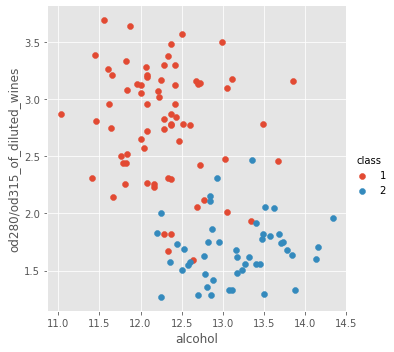

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
g=sns.FacetGrid(data,hue='class',size=5)
g.map(plt.scatter,"alcohol" , "od280/od315_of_diluted_wines")
g.add_legend()

In [3]:
#from sklearn.preprocessing import StandardScaler 為啥不用做標準化
from sklearn.model_selection import train_test_split
#x_train,x_test = train_test_split(data,test_size=0.8)
#y_train,y_test =x_train.iloc[:,13].values,x_test.iloc[:,13].values
#x_train,x_test=x_train.iloc[:,[0,11]].values,x_test.iloc[:,[0,11]].values
#sc=StandardScaler()
#sc.fit(x_train)
#X_train_std = sc.transform(x_train)
#sc.fit(x_test)
#X_test_std = sc.transform(x_test)
#--------------------------------------------------------------------------------------------------------------------
x=data.iloc[:,[0,11]].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

tree=DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=1)
forest=RandomForestClassifier(criterion='entropy',max_depth=25,random_state=1)
xgbc=XGBClassifier()

In [5]:
from sklearn.metrics import accuracy_score

tree=tree.fit(x_train,y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)
tree_train=accuracy_score(y_train,y_train_pred)
tree_test=accuracy_score(y_test,y_test_pred)
print('decision tree train/test accutancies %.3f/%.3f'%(tree_train,tree_test))


decision tree train/test accutancies 0.916/0.875


In [6]:
forest=forest.fit(x_train,y_train)
y_train_pred=forest.predict(x_train)
y_test_pred=forest.predict(x_test)
forest_train=accuracy_score(y_train,y_train_pred)
forest_test=accuracy_score(y_test,y_test_pred)
print('forest  train/test accutancies %.3f/%.3f'%(forest_train,forest_test))

forest  train/test accutancies 1.000/0.917


In [7]:
xgbc=xgbc.fit(x_train,y_train)
y_train_pred=xgbc.predict(x_train)
y_test_pred=xgbc.predict(x_test)
xgbc_train=accuracy_score(y_train,y_train_pred)
xgbc_test=accuracy_score(y_test,y_test_pred)
print('\nxgbc train/test accutancies %.3f/%.3f'%(xgbc_train,xgbc_test))

[16:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

xgbc train/test accutancies 0.979/0.917


C:\Users\Howard\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [8]:
from matplotlib.colors import ListedColormap
def plot_dicision_regions(X,Y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    camp = ListedColormap(colors[:len(np.unique(Y))])

    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y==cl,0],
                    y=X[Y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    
    if test_idx:
        x_test,y_test=X[test_idx,:],Y[test_idx]

        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=100,
                    label='test set')

    

<ipython-input-8-535bd7d8e94e>:12: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)


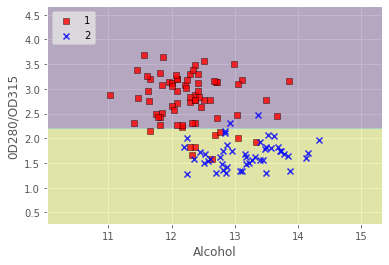

In [9]:
plot_dicision_regions(x,y,classifier=tree)
plt.xlabel('Alcohol')
plt.ylabel('0D280/OD315')
plt.legend(loc='upper left')

<ipython-input-8-535bd7d8e94e>:12: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)


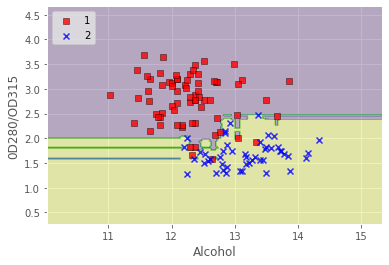

In [10]:
plot_dicision_regions(x,y,classifier=forest)
plt.xlabel('Alcohol')
plt.ylabel('0D280/OD315')
plt.legend(loc='upper left')

<ipython-input-8-535bd7d8e94e>:12: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)


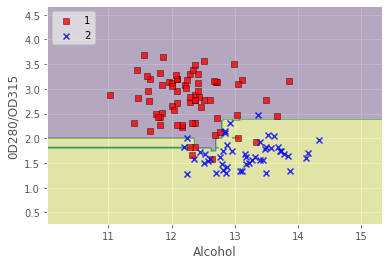

In [11]:
plot_dicision_regions(x,y,classifier=xgbc)
plt.xlabel('Alcohol')
plt.ylabel('0D280/OD315')
plt.legend(loc='upper left')